<a href="https://www.kaggle.com/code/nicholasb99/notebook99d6d4e4f9?scriptVersionId=114221111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import the necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


# CSV file
df = pd.read_csv('/kaggle/input/correlation-between-posture-personality-trait/Myers Briggs Table_S1.csv')

# To view the first few rows of data
df.head()


,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [2]:


#  'S No' column Will be rephrased to 'ID'
df = df.rename(columns={'S No': 'ID'})

# ID TO NUMERIC
df['ID'] = df['ID'].astype(int)

# Checking for Mising values
missing = df.isnull().sum()
print(missing)

# Now, Outliers 
summary = df.describe()
print(summary)

# cSEX and POSTURE should be categorical
df['SEX'] = df['SEX'].astype('category')
df['POSTURE'] = df['POSTURE'].astype('category')

# view the first few rows of the cleaned data
df.head()


ID                0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY LEVEL    0
PAIN 1            0
PAIN 2            0
PAIN 3            0
PAIN 4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64
              ID        AGE     HEIGHT     WEIGHT     PAIN 1     PAIN 2  \
count  97.000000  97.000000  97.000000   97.00000  97.000000  97.000000   
mean   49.000000  43.855670  65.731959  159.43299   2.139175   3.747423   
std    28.145456  16.776093   3.737522   36.19591   2.572635   3.191071   
min     1.000000  11.000000  58.000000   68.00000   0.000000   0.000000   
25%    25.000000  30.000000  63.000000  135.00000   0.000000   0.000000   
50%    49.000000  45.000000  66.000000  157.00000   1.000000   3.000000   
75%    73.000000  56.000000  68.000000  183.00000   4.000000  

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


I'm assuming these are all intended. Looks good.

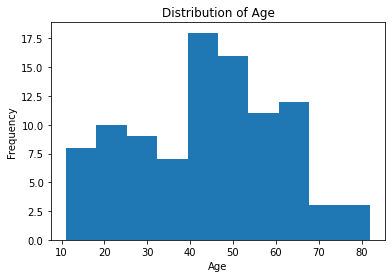

In [3]:
# A histogram to visualize the distribution of the 'AGE' variable
plt.hist(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

It will be important to understand the distrinbution of the age because it is often a key variable that can affect the results of the analysis

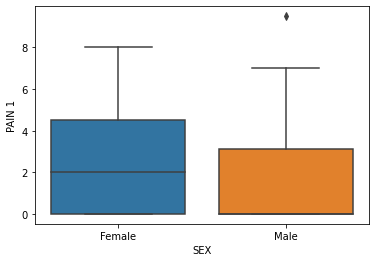

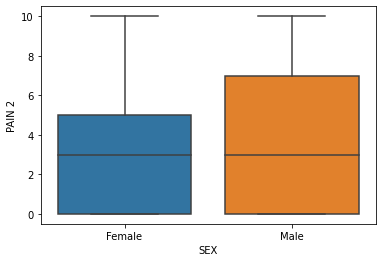

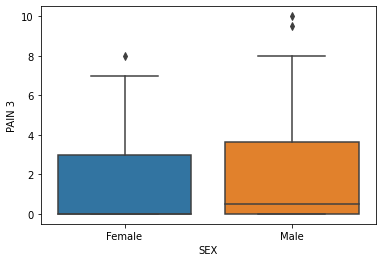

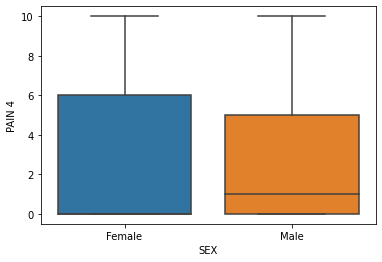

In [4]:
# Set up Box plot for each category of pain
sns.boxplot(x='SEX', y='PAIN 1', data=df)

plt.show()


sns.boxplot(x='SEX', y='PAIN 2', data=df)

# show the plot
plt.show()


sns.boxplot(x='SEX', y='PAIN 3', data=df)

# show the plot
plt.show()


sns.boxplot(x='SEX', y='PAIN 4', data=df)

# Print
plt.show()



This shows that women, based off of this sample, are more likely to experience neck and other types of pain, while men are more likely to experience thoracic and lumbar pain. This is important as it emphasizes on the importance of bearing in mind that sex may act as a significant predictor for pain in of itself. 

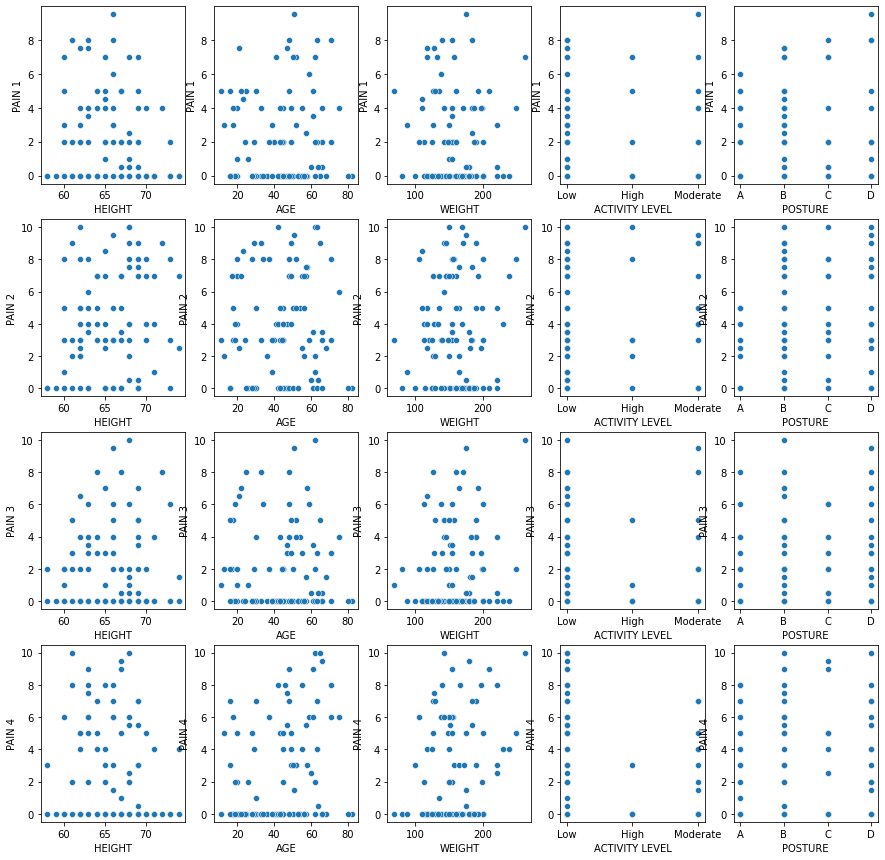

In [5]:

import seaborn as sns

# Categories of pain list
pain_categories = ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']

# To what are the predictor variables
predictor_variables = ['HEIGHT', 'AGE', 'WEIGHT', 'ACTIVITY LEVEL', 'POSTURE']

# Subplot figure
fig, axs = plt.subplots(4, 5, figsize=(15, 15))

# Iteration for the pain categories
for i, pain_category in enumerate(pain_categories):
    # iterate over the predictor variables
    for j, predictor_variable in enumerate(predictor_variables):
        # create a scatterplot of the pain category and predictor variable
        sns.scatterplot(x=predictor_variable, y=pain_category, data=df, ax=axs[i, j])
        
        # add labels to the x-axis and y-axis
        axs[i, j].set_xlabel(predictor_variable)
        axs[i, j].set_ylabel(pain_category)

# show the plot
plt.show()



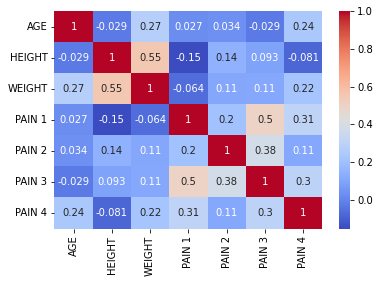

In [6]:
# Specify the predictor variables and the pain categories
predictor_variables = ['AGE', 'SEX', 'POSTURE', 'HEIGHT', 'WEIGHT', 'ACTIVITY LEVEL']
pain_categories = ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']

# Heat map to explore correlational relationship
sns.heatmap(df[predictor_variables + pain_categories].corr(), annot=True, cmap='coolwarm')


plt.show()








In [7]:
# Predictor Variables
predictor_variables = ['AGE', 'SEX', 'POSTURE', 'HEIGHT', 'WEIGHT', 'ACTIVITY LEVEL']

# Itterate through pain categories
for pain_category in ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']:
    # Now predictors
    for predictor_variable in predictor_variables:
        # create a contingency table
        contingency_table = pd.crosstab(df[predictor_variable], df[pain_category])
        # perform the chi-squared test of independence
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        # print the results
        print(f'The chi-squared test of independence between {predictor_variable} and {pain_category} is {chi2:.3f} (p-value = {p_value:.3f}).')

The chi-squared test of independence between AGE and PAIN 1 is 895.323 (p-value = 0.000).
The chi-squared test of independence between SEX and PAIN 1 is 19.635 (p-value = 0.142).
The chi-squared test of independence between POSTURE and PAIN 1 is 40.402 (p-value = 0.541).
The chi-squared test of independence between HEIGHT and PAIN 1 is 161.662 (p-value = 0.999).
The chi-squared test of independence between WEIGHT and PAIN 1 is 740.815 (p-value = 0.647).
The chi-squared test of independence between ACTIVITY LEVEL and PAIN 1 is 16.266 (p-value = 0.962).
The chi-squared test of independence between AGE and PAIN 2 is 1007.471 (p-value = 0.000).
The chi-squared test of independence between SEX and PAIN 2 is 13.697 (p-value = 0.621).
The chi-squared test of independence between POSTURE and PAIN 2 is 51.785 (p-value = 0.328).
The chi-squared test of independence between HEIGHT and PAIN 2 is 237.802 (p-value = 0.787).
The chi-squared test of independence between WEIGHT and PAIN 2 is 820.286 (p

Judging by this about, it is apparent that Activity Level is better at predicting neck pain, Posture is a better predictor for thoracic pain, Age is the better predictor for lumbar pain, and weight is the better predictor for other types of pain. I would suggest adding more sample data and more columns of data such as health history, country, and line of work. 

In [8]:
# List of variable predictions
predictor_variables = ['AGE', 'POSTURE', 'HEIGHT', 'WEIGHT', 'ACTIVITY LEVEL']


for pain_category in ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']:
  
    df_male = df[df['SEX'] == 'Male']
    
    # Continue itteration 
    if df_male.shape[0] > 0:
        # Predictor variable itteration
        for predictor_variable in predictor_variables:
            # To Calculate the chi-squared test for male subjects
            male_ctab, male_p_value, male_dof, male_expected = chi2_contingency(pd.crosstab(df_male[predictor_variable], df_male[pain_category]))

            # To print the results for male subjects
            print(f'For male subjects, the chi-squared test between {predictor_variable} and {pain_category} gives a p-value of {male_p_value:.3f}.')
    
    # Here, Create a dataframe for female subjects
    df_female = df[df['SEX'] == 'Female']
    
    # Shape of df
    if df_female.shape[0] > 0:
        # loop through each predictor variable
        for predictor_variable in predictor_variables:
            # chi square
            female_ctab, female_p_value, female_dof, female_expected = chi2_contingency(pd.crosstab(df_female[predictor_variable], df_female[pain_category]))

            # print for female
            print(f'For female subjects, the chi-squared test between {predictor_variable} and {pain_category} gives a p-value of {female_p_value:.3f}.')



For male subjects, the chi-squared test between AGE and PAIN 1 gives a p-value of 0.816.
For male subjects, the chi-squared test between POSTURE and PAIN 1 gives a p-value of 0.485.
For male subjects, the chi-squared test between HEIGHT and PAIN 1 gives a p-value of 0.845.
For male subjects, the chi-squared test between WEIGHT and PAIN 1 gives a p-value of 0.125.
For male subjects, the chi-squared test between ACTIVITY LEVEL and PAIN 1 gives a p-value of 0.798.
For female subjects, the chi-squared test between AGE and PAIN 1 gives a p-value of 0.039.
For female subjects, the chi-squared test between POSTURE and PAIN 1 gives a p-value of 0.259.
For female subjects, the chi-squared test between HEIGHT and PAIN 1 gives a p-value of 0.809.
For female subjects, the chi-squared test between WEIGHT and PAIN 1 gives a p-value of 0.484.
For female subjects, the chi-squared test between ACTIVITY LEVEL and PAIN 1 gives a p-value of 0.861.
For male subjects, the chi-squared test between AGE and PA

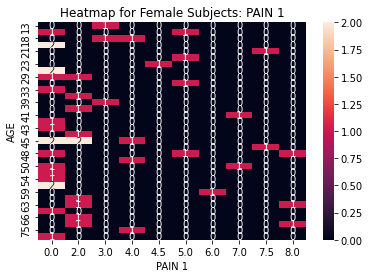

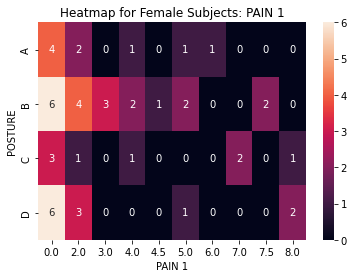

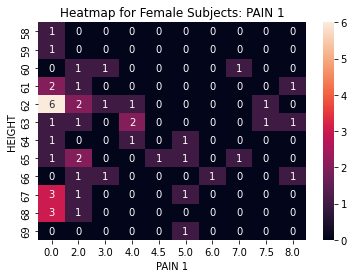

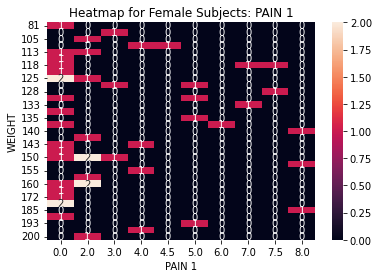

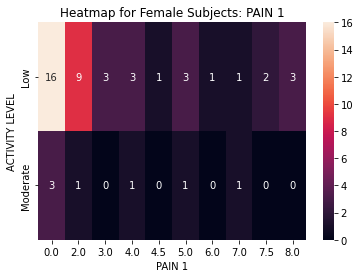

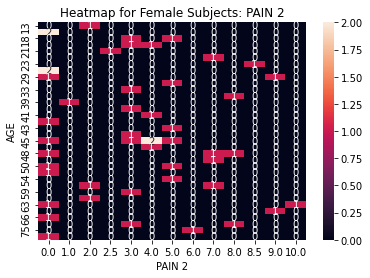

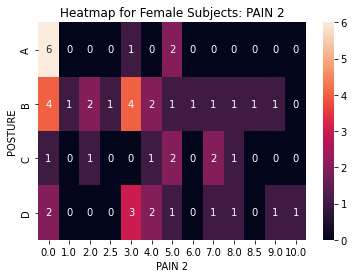

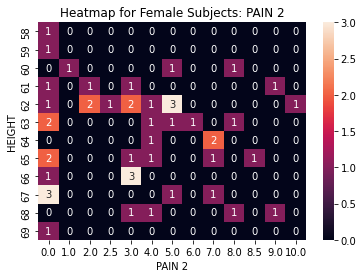

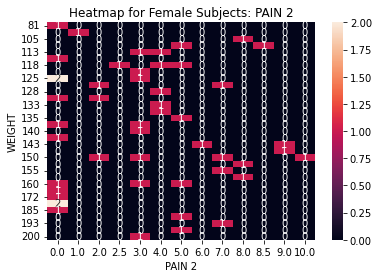

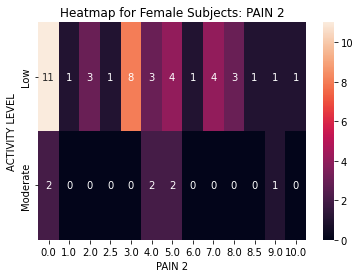

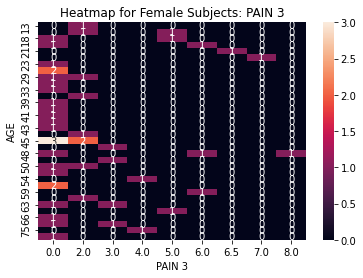

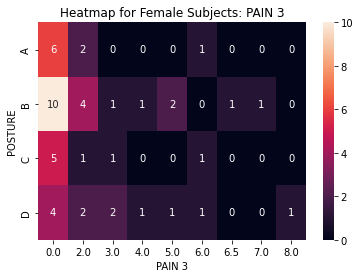

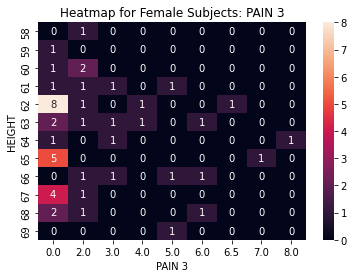

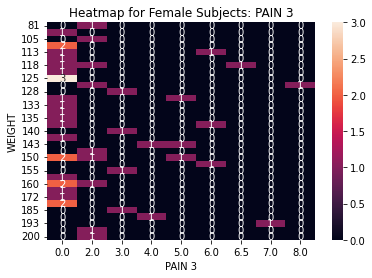

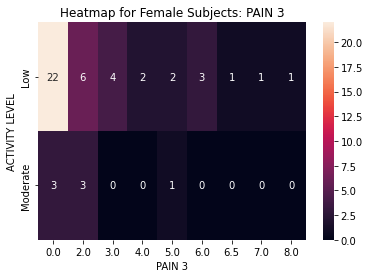

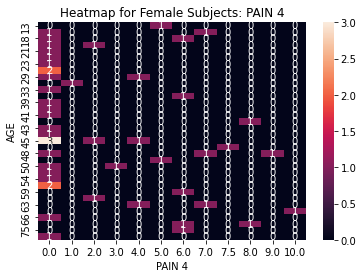

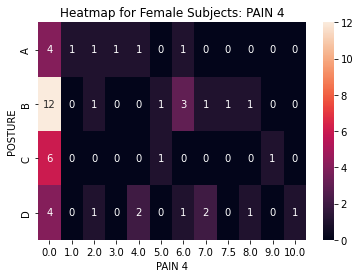

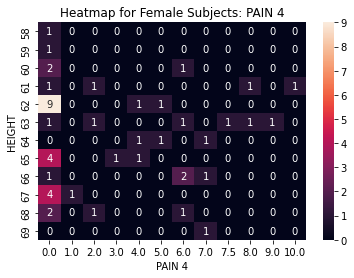

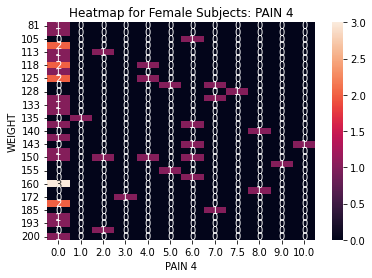

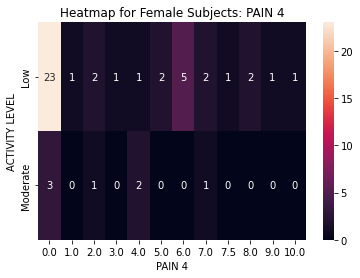

In [9]:


# List of predictor variables
predictor_variables = ['AGE', 'POSTURE', 'HEIGHT', 'WEIGHT', 'ACTIVITY LEVEL']

# Pain category loop
for pain_category in ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']:
    # create a dataframe for female subjects
    df_female = df[df['SEX'] == 'Female']
    
    # df check
    if df_female.shape[0] > 0:
        # loop through each predictor variable
        for predictor_variable in predictor_variables:
            # Crosstab
            female_ctab = pd.crosstab(df_female[predictor_variable], df_female[pain_category])
            
            # Heatmap generation
            sns.heatmap(female_ctab, annot=True, fmt='d')
            plt.title(f'Heatmap for Female Subjects: {pain_category}')
            plt.xlabel(pain_category)
            plt.ylabel(predictor_variable)
            plt.show()




To wrap this up, from the beginning we saw a variation between male and women, and how they experience pain. So here are Heatmaps that shows various relationships between the category of Pain and the predictor (AGE, WEIGHT, HEIGHT, POSTURE) separated by SEX. In the next cell, the Male SEX will then be discerned. 

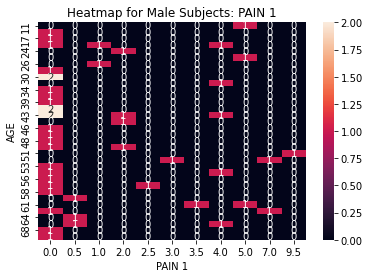

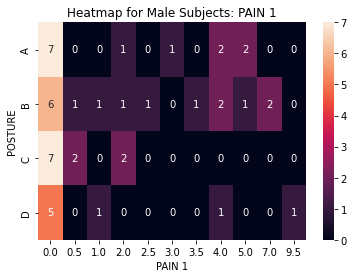

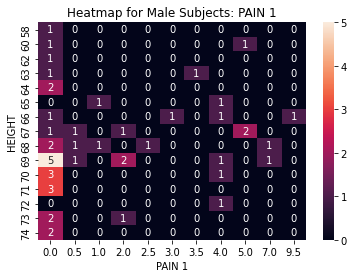

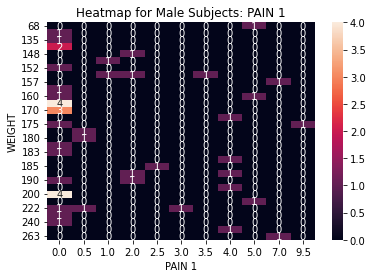

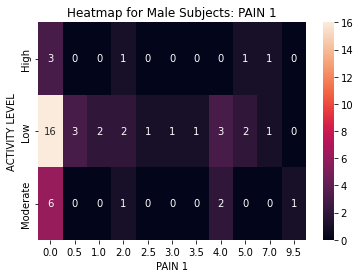

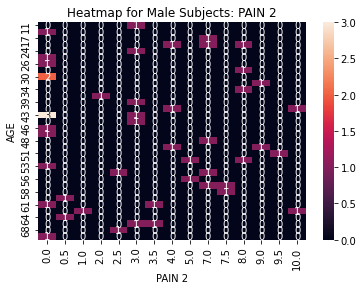

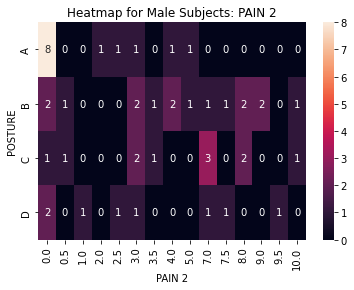

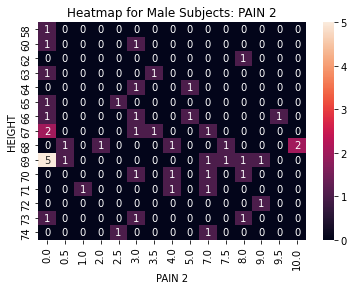

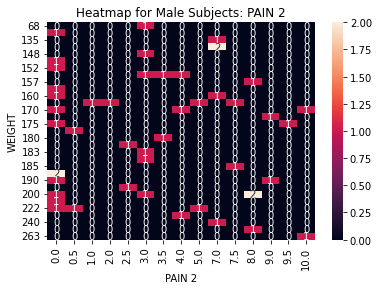

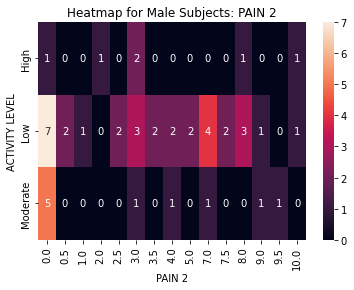

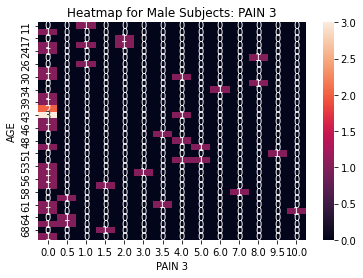

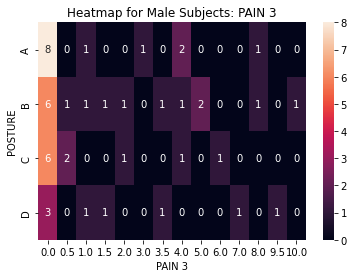

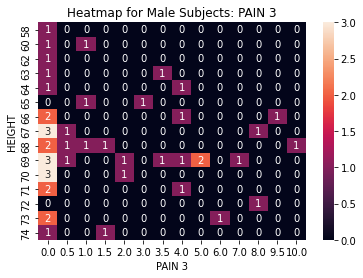

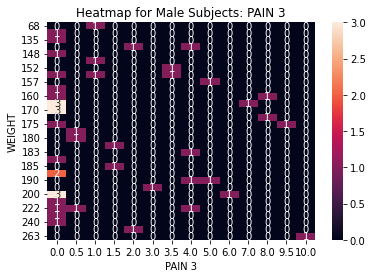

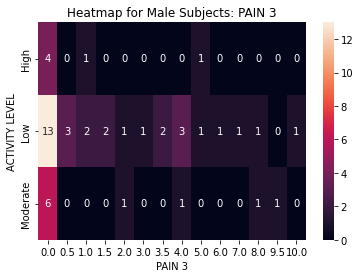

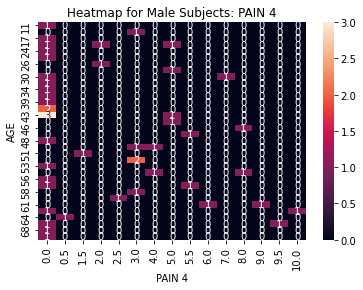

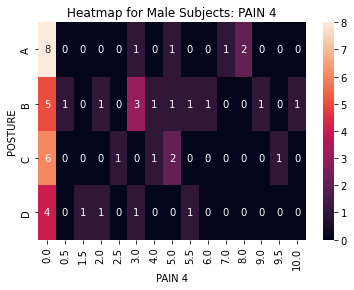

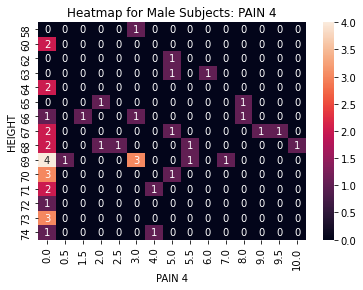

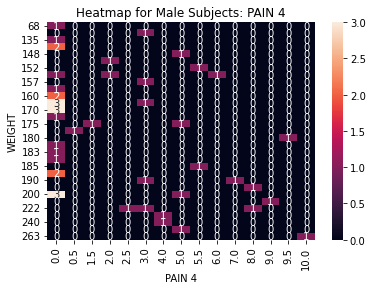

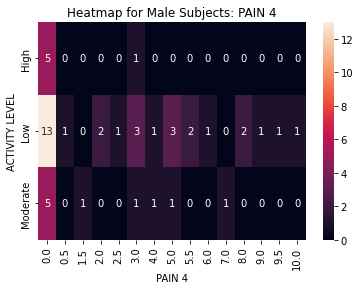

In [10]:
# List of predictor variables
predictor_variables = ['AGE', 'POSTURE', 'HEIGHT', 'WEIGHT', 'ACTIVITY LEVEL']

# loop 
for pain_category in ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']:
    # male df
    df_female = df[df['SEX'] == 'Male']
    
    # check df
    if df_female.shape[0] > 0:
        # loop through each predictor variable
        for predictor_variable in predictor_variables:
            # Cross tab
            female_ctab = pd.crosstab(df_female[predictor_variable], df_female[pain_category])
            
            # Heatmap using the crosstab data
            sns.heatmap(female_ctab, annot=True, fmt='d')
            plt.title(f'Heatmap for Male Subjects: {pain_category}')
            plt.xlabel(pain_category)
            plt.ylabel(predictor_variable)
            plt.show()


Analysis to be continued via analytical summary and perhaps more statistical summaries with hypotheses. 